In [10]:
import json
import uuid
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [11]:
def create_id():
    """Generate a unique identifier for the task."""
    return str(uuid.uuid4())

def validate_status(status):
    """Validate the task status."""
    valid_statuses = {"To Do", "In Progress", "Done"}
    if status not in valid_statuses:
        raise ValueError(f"Invalid status: {status}. Valid statuses are: {valid_statuses}")

def validate_priority(priority):
    """Validate the task priority."""
    valid_priorities = {"Low", "Medium", "High"}
    if priority not in valid_priorities:
        raise ValueError(f"Invalid priority: {priority}. Valid priorities are: {valid_priorities}")

In [12]:
def create_task(name, description, status, priority="Medium", assignee=None, due_date=None):
    """Create a JSON object for a Kanban board task with validation."""
    validate_status(status)
    validate_priority(priority)

    task = {
        "id": create_id(),
        "name": name,
        "description": description,
        "status": status,
        "priority": priority,
        "assignee": assignee,
        "dueDate": due_date,
        "createdDate": datetime.now().isoformat(),
        "updatedDate": datetime.now().isoformat(),
        "tags": [],
        "comments": [],
        "subtasks": [],
        "attachments": [],
        "progress": 0,
        "estimatedTime": None
    }
    return task  # Return the task object directly

In [13]:
# # Example usage
# try:
#     task = create_task("Design landing page", "Create a landing page for the upcoming product launch.", "In Progress")
#     print(json.dumps(task, indent=2))
# except ValueError as e:
#     print(e)

In [14]:
def visualize_kanban_board(tasks):
    """Visualize the Kanban board using Matplotlib."""
    
    # Define the board structure
    columns = {"To Do": [], "In Progress": [], "Done": []}
    for task in tasks:
        columns[task['status']].append(task)

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlim(0, 3)
    ax.set_ylim(0, max(len(task_list) for task_list in columns.values()) + 1)
    
    # Define colors for priorities
    priority_colors = {
        "Low": "green",
        "Medium": "yellow",
        "High": "red"
    }

    # Draw columns and tasks
    for i, (status, task_list) in enumerate(columns.items()):
        ax.text(i + 0.5, len(task_list) + 0.5, status, ha='center', fontsize=16, weight='bold')
        
        for j, task in enumerate(task_list):
            rect = patches.Rectangle((i + 0.1, j), 0.8, 0.8, linewidth=1, edgecolor='black',
                                     facecolor=priority_colors[task['priority']])
            ax.add_patch(rect)
            ax.text(i + 0.5, j + 0.4, f"{task['name']}\n{task['assignee']}", 
                    ha='center', va='center', fontsize=10)

    # Remove axes
    ax.axis('off')
    plt.title("Kanban Board")
    plt.show()

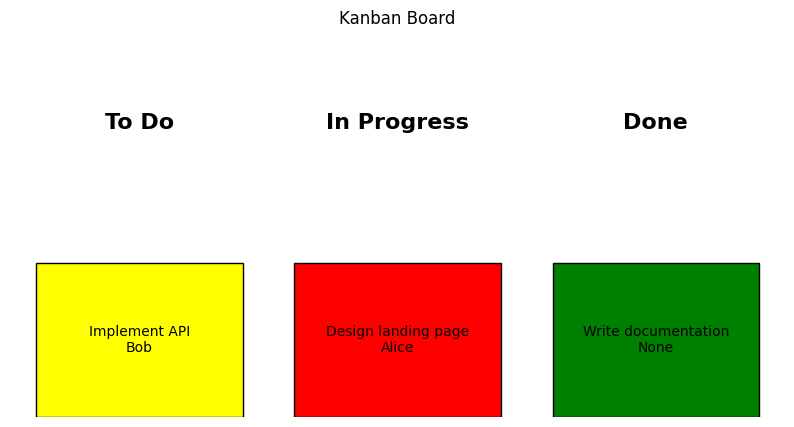

In [15]:
# Example usage
tasks = [
    create_task("Design landing page", "Create a landing page for the upcoming product launch.", "In Progress", "High", "Alice"),
    create_task("Implement API", "Develop the backend API for the app.", "To Do", "Medium", "Bob"),
    create_task("Write documentation", "Document the project setup and usage.", "Done", "Low"),
]

visualize_kanban_board(tasks)

In [16]:
def visualize_kanban_board_cli(tasks):
    """Visualize the Kanban board in a pictorial format."""
    
    # Define columns for the Kanban board
    columns = {
        "To Do": [],
        "In Progress": [],
        "Done": []
    }
    
    # Sort tasks into the appropriate columns based on their status
    for task in tasks:
        columns[task['status']].append(task)

    # Print the Kanban board header
    print("Kanban Board")
    print("=" * 50)
    
    for status, task_list in columns.items():
        print(f"\n{status}")
        print("-" * 50)
        
        if not task_list:
            print("No tasks")
            continue
        
        # Print each task in a box
        for task in task_list:
            task_id = task.get("id")
            name = task.get("name")
            assignee = task.get("assignee") or "Unassigned"
            priority = task.get("priority")

            # Create a box around the task details
            print(f"| Task ID: {task_id:<30} |")
            print(f"| Task Name: {name:<25} |")
            print(f"| Assignee: {assignee:<22} |")
            print(f"| Priority: {priority:<22} |")
            print("-" * 50)

In [18]:
# Example usage
tasks = [
    create_task("Design landing page", "Create a landing page for the upcoming product launch.", "In Progress", "High", "Alice"),
    create_task("Implement API", "Develop the backend API for the app.", "To Do", "Medium", "Bob"),
    create_task("Write documentation", "Document the project setup and usage.", "Done", "Low"),
]
print(json.dumps(tasks,indent=2))
visualize_kanban_board_cli(tasks)

[
  {
    "id": "d10bbd99-e56b-4d7e-9e48-3fbb5b17b033",
    "name": "Design landing page",
    "description": "Create a landing page for the upcoming product launch.",
    "status": "In Progress",
    "priority": "High",
    "assignee": "Alice",
    "dueDate": null,
    "createdDate": "2024-11-12T20:09:27.123580",
    "updatedDate": "2024-11-12T20:09:27.123580",
    "tags": [],
    "comments": [],
    "subtasks": [],
    "attachments": [],
    "progress": 0,
    "estimatedTime": null
  },
  {
    "id": "a47252fc-c8c6-4dbc-8c94-d4b1a45699df",
    "name": "Implement API",
    "description": "Develop the backend API for the app.",
    "status": "To Do",
    "priority": "Medium",
    "assignee": "Bob",
    "dueDate": null,
    "createdDate": "2024-11-12T20:09:27.123580",
    "updatedDate": "2024-11-12T20:09:27.123580",
    "tags": [],
    "comments": [],
    "subtasks": [],
    "attachments": [],
    "progress": 0,
    "estimatedTime": null
  },
  {
    "id": "e0beb0b8-a325-485c-b9c7-1b7ae